<a href="https://colab.research.google.com/github/joyalsaji2k/predictive-hair-fall-/blob/main/hloss2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hair Loss Prediction**


**Abstract**


This dataset about hair loss prediction is based on some features. The hair loss prediction dataset contains various features related to a person's health and lifestyle, such as stress level, coffee consumption, hair grease usage, etc. These features can be used to predict the likelihood of a person experiencing hair loss, which can help doctors and hair specialists diagnose and treat their patients more effectively. The dataset is a valuable resource for researchers and practitioners in the field of hair loss treatment and prevention.

In [ ]:
import tensorflow as tf
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Luke_hair_loss_documentation.csv')

Performing Exploratory Data Analysis
**bold text**What kind of data exploration did you do?
Preliminary findings from the EDA.

Datatype Check - All the features in the dataset are Integers/ Float as it was converted by numerical/categorical variables.
Missing Data Check - Missing values were present in the hair_grease feature and were imputed using mean imputation.
Distribution of training data - Probability distribution of each feature in the training dataset was checked.
Correlation Check - Correlation was checked using heatmap and pairplot, revealing significant multi-collinearity issues.
Barplot - A barplot analysis was performed to determine the impact of a variable on the level of hair_loss.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   date                    400 non-null    object  
 1   stay_up_late            400 non-null    category
 2   pressure_level          400 non-null    int64   
 3   coffee_consumed         400 non-null    int64   
 4   brain_working_duration  400 non-null    int64   
 5   school_assesssment      400 non-null    object  
 6   stress_level            400 non-null    int64   
 7   shampoo_brand           400 non-null    object  
 8   swimming                400 non-null    int64   
 9   hair_washing            400 non-null    object  
 10  hair_grease             400 non-null    float64 
 11  dandruff                111 non-null    object  
 12  libido                  400 non-null    int64   
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 38.4+ KB


In [ ]:
# Observation:
# There are 2 types : Numerical and Categorical
# Numerical - stay_up_late, coffee_consumed, brain_working_duration, hair_grease,libido
# Categorical- pressure_level, school_assesssment, stress_level, shampoo_brand, swimming, hair_washing, dandruf

In [ ]:
df.head(100)

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,Few,2,Low,0,1,None,Low,Pantene,No,Y,3.0,None,1
1,2/01/2021,Few,0,Low,0,3,None,Low,Pantene,No,N,1.0,None,1
2,3/01/2021,Medium,3,Low,1,0,None,Low,Pantene,Yes,Y,2.0,None,2
3,4/01/2021,Few,2,Low,0,1,None,Low,Pantene,No,N,3.0,None,3
4,5/01/2021,Few,2,Low,0,1,None,Low,Pantene,No,Y,1.0,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6/04/2021,Medium,2,Medium,0,3,None,Medium,Hair & Shoulder,No,Y,3.0,None,5
96,7/04/2021,Medium,3,High,3,7,Team ass,High,Hair & Shoulder,No,N,4.0,Few,0
97,8/04/2021,Medium,2,High,4,7,Team ass,High,Hair & Shoulder,No,Y,4.0,Few,0
98,9/04/2021,Many,2,High,4,7,Team ass,High,Hair & Shoulder,No,N,4.0,Few,0


**bold text**check for missing values **bold text**

In [ ]:
#Are there missing values?
df.isna().sum()

date                      0
hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               4
dandruff                  0
libido                    0
dtype: int64

# Observati0n:
Data is missing from the column hair_grease column, which means it is required to impute or remove the null values from the data. The independent variable hair_grease has missing data and the total number of missing data is 4

Used the mean replacement technique as the missing values were not correlated and were less in number

In [ ]:
df = df.fillna(df.mean())
df.head(100)


,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,Few,2,Low,0,1,None,Low,Pantene,No,Y,3.0,None,1
1,2/01/2021,Few,0,Low,0,3,None,Low,Pantene,No,N,1.0,None,1
2,3/01/2021,Medium,3,Low,1,0,None,Low,Pantene,Yes,Y,2.0,None,2
3,4/01/2021,Few,2,Low,0,1,None,Low,Pantene,No,N,3.0,None,3
4,5/01/2021,Few,2,Low,0,1,None,Low,Pantene,No,Y,1.0,None,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6/04/2021,Medium,2,Medium,0,3,None,Medium,Hair & Shoulder,No,Y,3.0,None,5
96,7/04/2021,Medium,3,High,3,7,Team ass,High,Hair & Shoulder,No,N,4.0,Few,0
97,8/04/2021,Medium,2,High,4,7,Team ass,High,Hair & Shoulder,No,Y,4.0,Few,0
98,9/04/2021,Many,2,High,4,7,Team ass,High,Hair & Shoulder,No,N,4.0,Few,0


In [ ]:
#Mean replacement imputation technique
df.isna().sum()


date                      0
hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               0
dandruff                  0
libido                    0
dtype: int64

In [ ]:
#Replaced categorical value with numerical values as it will be easier to plot qqplots and make assumptions

df['dandruff'].replace('None',0,inplace=True)
df['dandruff'].replace('Few',1,inplace=True)
df['dandruff'].replace('Many',2, inplace=True)

df['hair_loss'].replace("Few", 0, inplace=True)
df['hair_loss'].replace("Medium", 1, inplace=True)
df['hair_loss'].replace("Many", 2, inplace=True)
df['hair_loss'].replace("A lot", 3, inplace=True)

df['swimming'].replace('Yes', 1, inplace=True)
df['swimming'].replace('No', 0, inplace=True)

df.replace('Low', 0, inplace=True)
df.replace('Medium', 1, inplace=True)
df.replace('High', 2, inplace=True)
df.replace('Very High', 3, inplace=True)

df.head(100)

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,0,2,0,0,1,None,0,Pantene,0,Y,3.0,0,1
1,2/01/2021,0,0,0,0,3,None,0,Pantene,0,N,1.0,0,1
2,3/01/2021,1,3,0,1,0,None,0,Pantene,1,Y,2.0,0,2
3,4/01/2021,0,2,0,0,1,None,0,Pantene,0,N,3.0,0,3
4,5/01/2021,0,2,0,0,1,None,0,Pantene,0,Y,1.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6/04/2021,1,2,1,0,3,None,1,Hair & Shoulder,0,Y,3.0,0,5
96,7/04/2021,1,3,2,3,7,Team ass,2,Hair & Shoulder,0,N,4.0,1,0
97,8/04/2021,1,2,2,4,7,Team ass,2,Hair & Shoulder,0,Y,4.0,1,0
98,9/04/2021,2,2,2,4,7,Team ass,2,Hair & Shoulder,0,N,4.0,1,0


In [ ]:
df[var] = df[var].astype(str)
print(df[var].dtype)


object


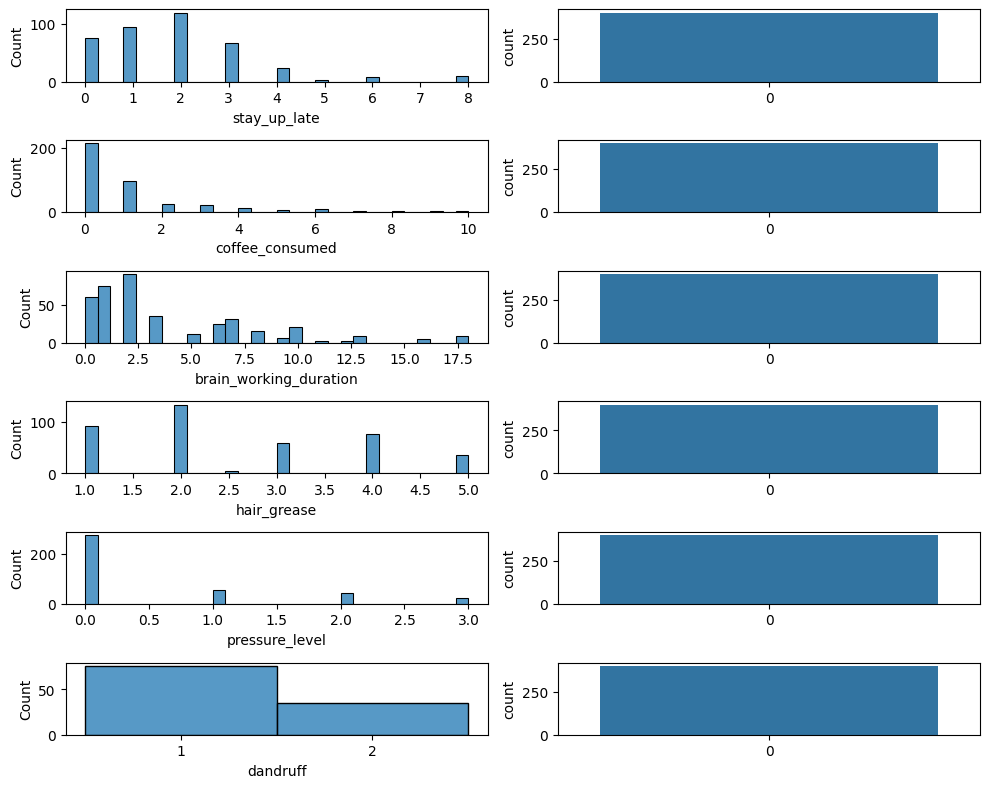

In [ ]:
#What are the likely distributions of the numeric variables?
# df = df.astype(float)
numeric_vars = ['stay_up_late', 'coffee_consumed', 'brain_working_duration', 'hair_grease', 'pressure_level', 'dandruff']

fig, axs = plt.subplots(len(numeric_vars), 2, figsize=(10, 8))

for i, var in enumerate(numeric_vars):

    sns.histplot(df[var],bins=30, edgecolor='black', ax=axs[i][0])
    sns.countplot(df[var], ax=axs[i][1])

plt.tight_layout()
plt.show()

**Correlation Analysis**

In [ ]:
df.corr()

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,swimming,hair_grease,libido
hair_loss,1.000000,0.350551,0.779733,0.671447,0.591093,0.784986,-0.240211,0.681833,0.140884
stay_up_late,0.350551,1.000000,0.508844,0.718017,0.603039,0.352284,-0.127301,0.439185,-0.061987
pressure_level,0.779733,0.508844,1.000000,0.826228,0.797197,0.889836,-0.269659,0.829852,0.066658
coffee_consumed,0.671447,0.718017,0.826228,1.000000,0.847582,0.725233,-0.147065,0.680236,0.036706
brain_working_duration,0.591093,0.603039,0.797197,0.847582,1.000000,0.726903,-0.228026,0.717837,-0.083707
stress_level,0.784986,0.352284,0.889836,0.725233,0.726903,1.000000,-0.312828,0.747642,0.045168
swimming,-0.240211,-0.127301,-0.269659,-0.147065,-0.228026,-0.312828,1.000000,-0.278167,0.087026
hair_grease,0.681833,0.439185,0.829852,0.680236,0.717837,0.747642,-0.278167,1.000000,0.059235
libido,0.140884,-0.061987,0.066658,0.036706,-0.083707,0.045168,0.087026,0.059235,1.000000


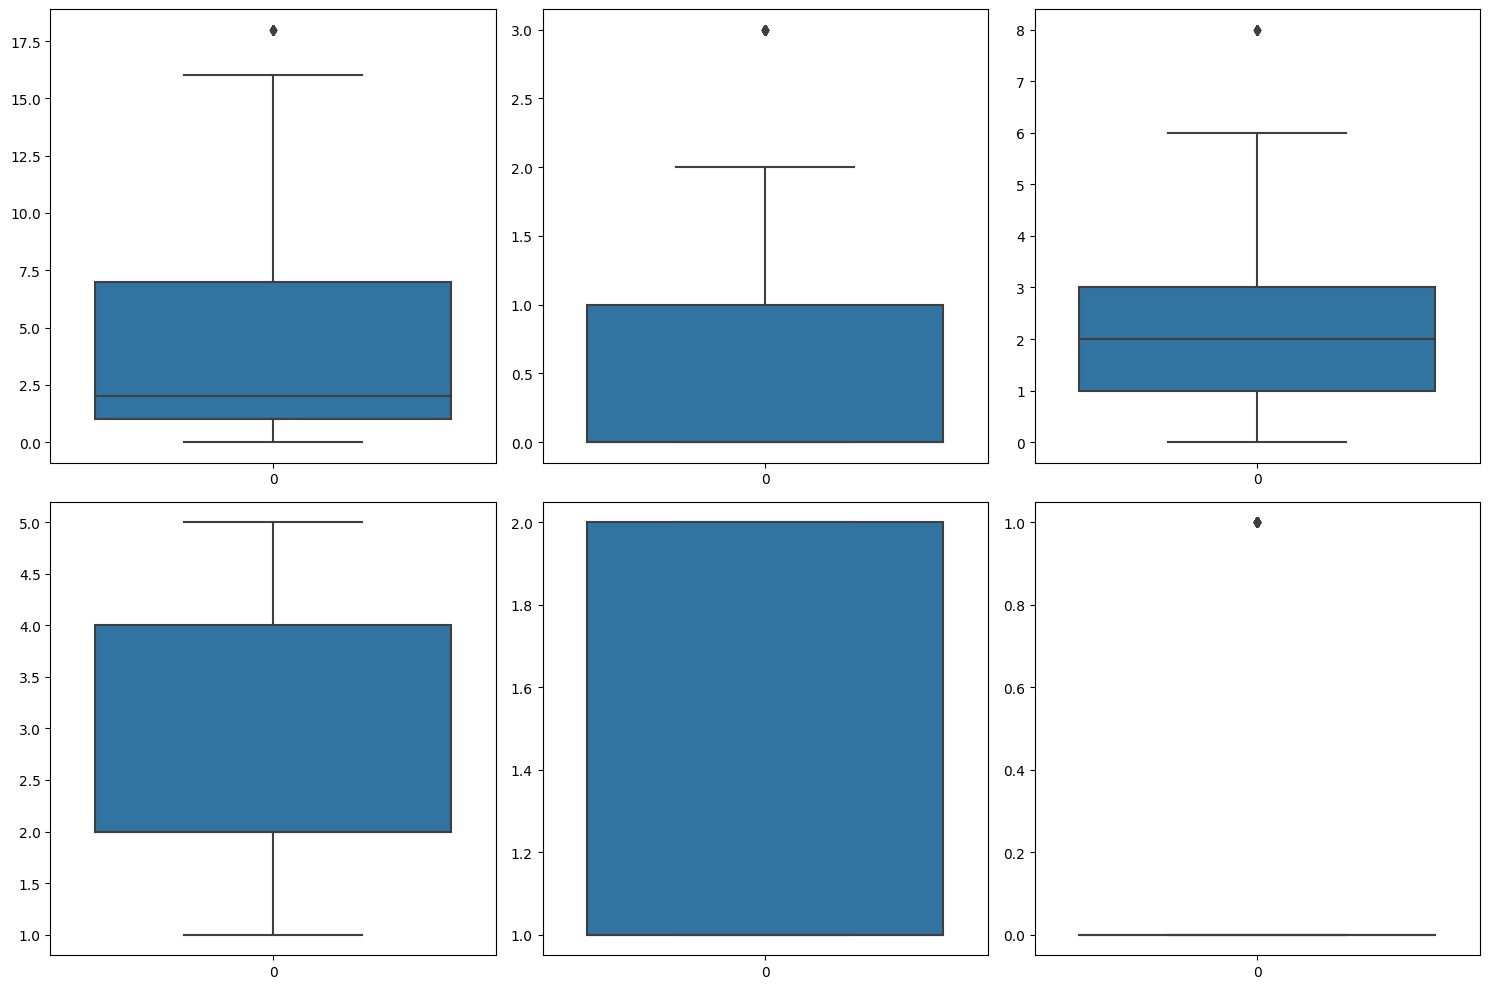

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
sns.boxplot(df['brain_working_duration'], ax=axes[0,0])
sns.boxplot(df['pressure_level'], ax=axes[0,1])
sns.boxplot(df['stay_up_late'], ax=axes[0,2])
sns.boxplot(df['hair_grease'], ax=axes[1,0])
df['dandruff'] = df['dandruff'].replace('None', np.nan)
sns.boxplot(df['dandruff'], ax=axes[1,1])
sns.boxplot(df['hair_loss'], ax=axes[1,2])
plt.tight_layout()
plt.show()

**Observation**:
It is clear to visualize and interpret the data. Looking at the boxplot above, we can infer below:

1.Brain Working Duration, Coffee Consumed,Pressure Level,Stay Up Late are having few outliers. Few people have greater Brain Working Duration, coffee consumption, different pressure level, staying up late.
2.Few independent variables are very close to zero like person having coffee, people having no pressure, people having no dandruff etc.
3.For other variables like Dandruff, Hair Grease, Stay Up Late, Brain Working duration it looks like most of the values lies in between of the respective ranges of the variabl

**Correlation Analysis Using Heatmap**
Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.



<Axes: >

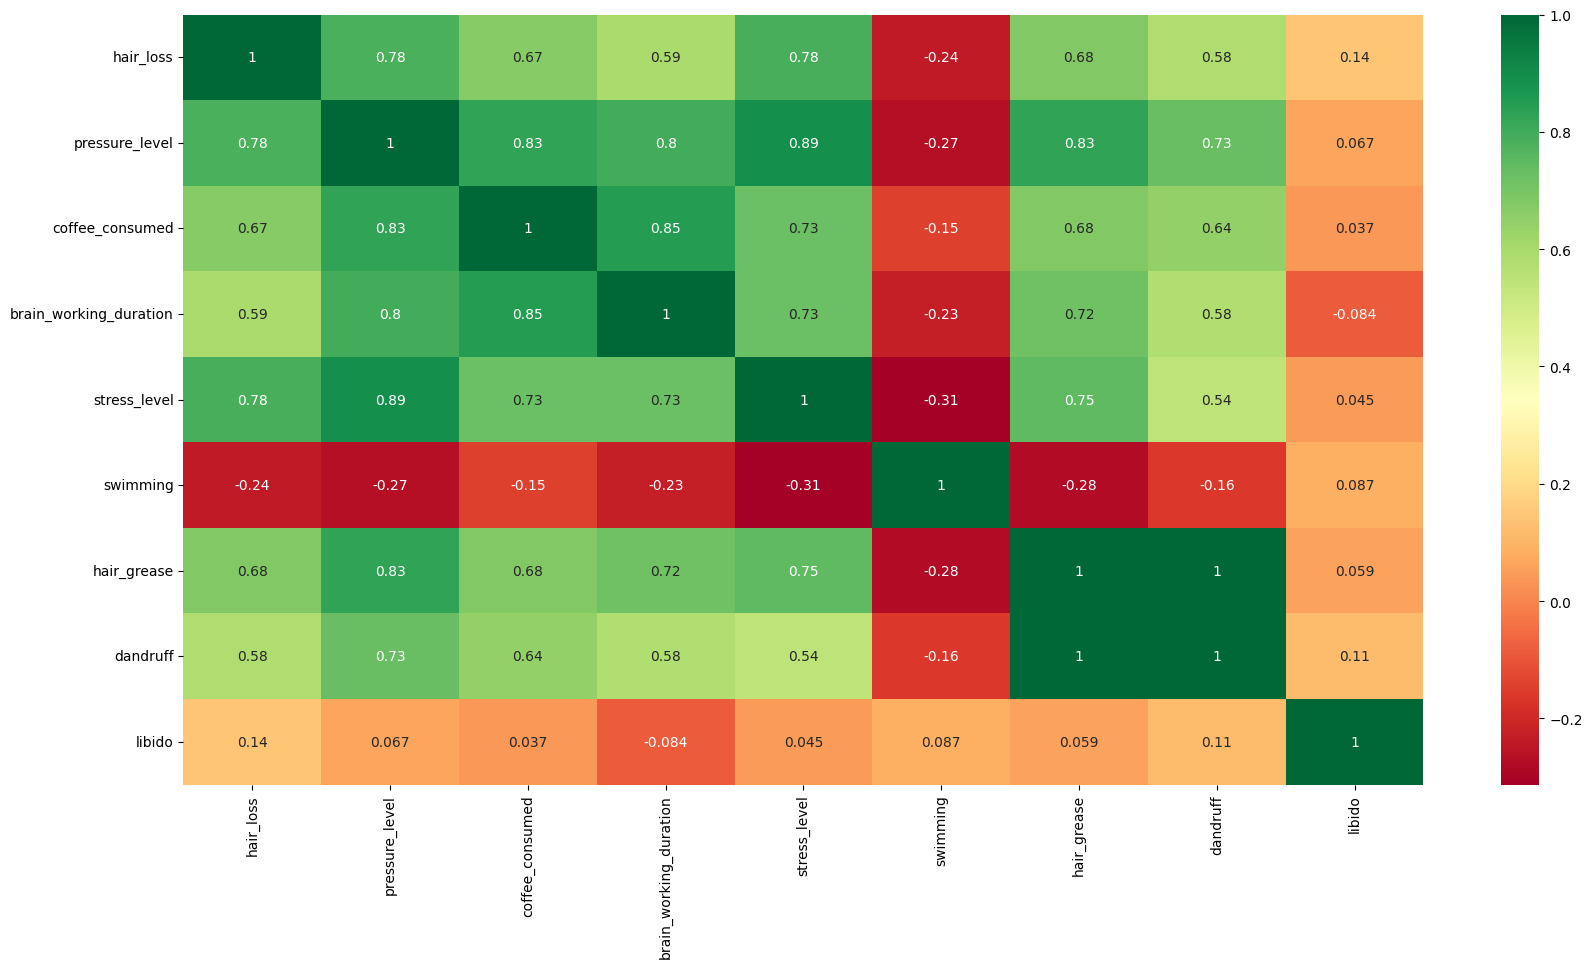

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', )

**Observation:**
Correlation matrix and heatmap shows that there is multicollinearity between the independent variables. Highest correlation is between Pressure Level and Dandruff.

**Correlation Analysis Using pairplot**

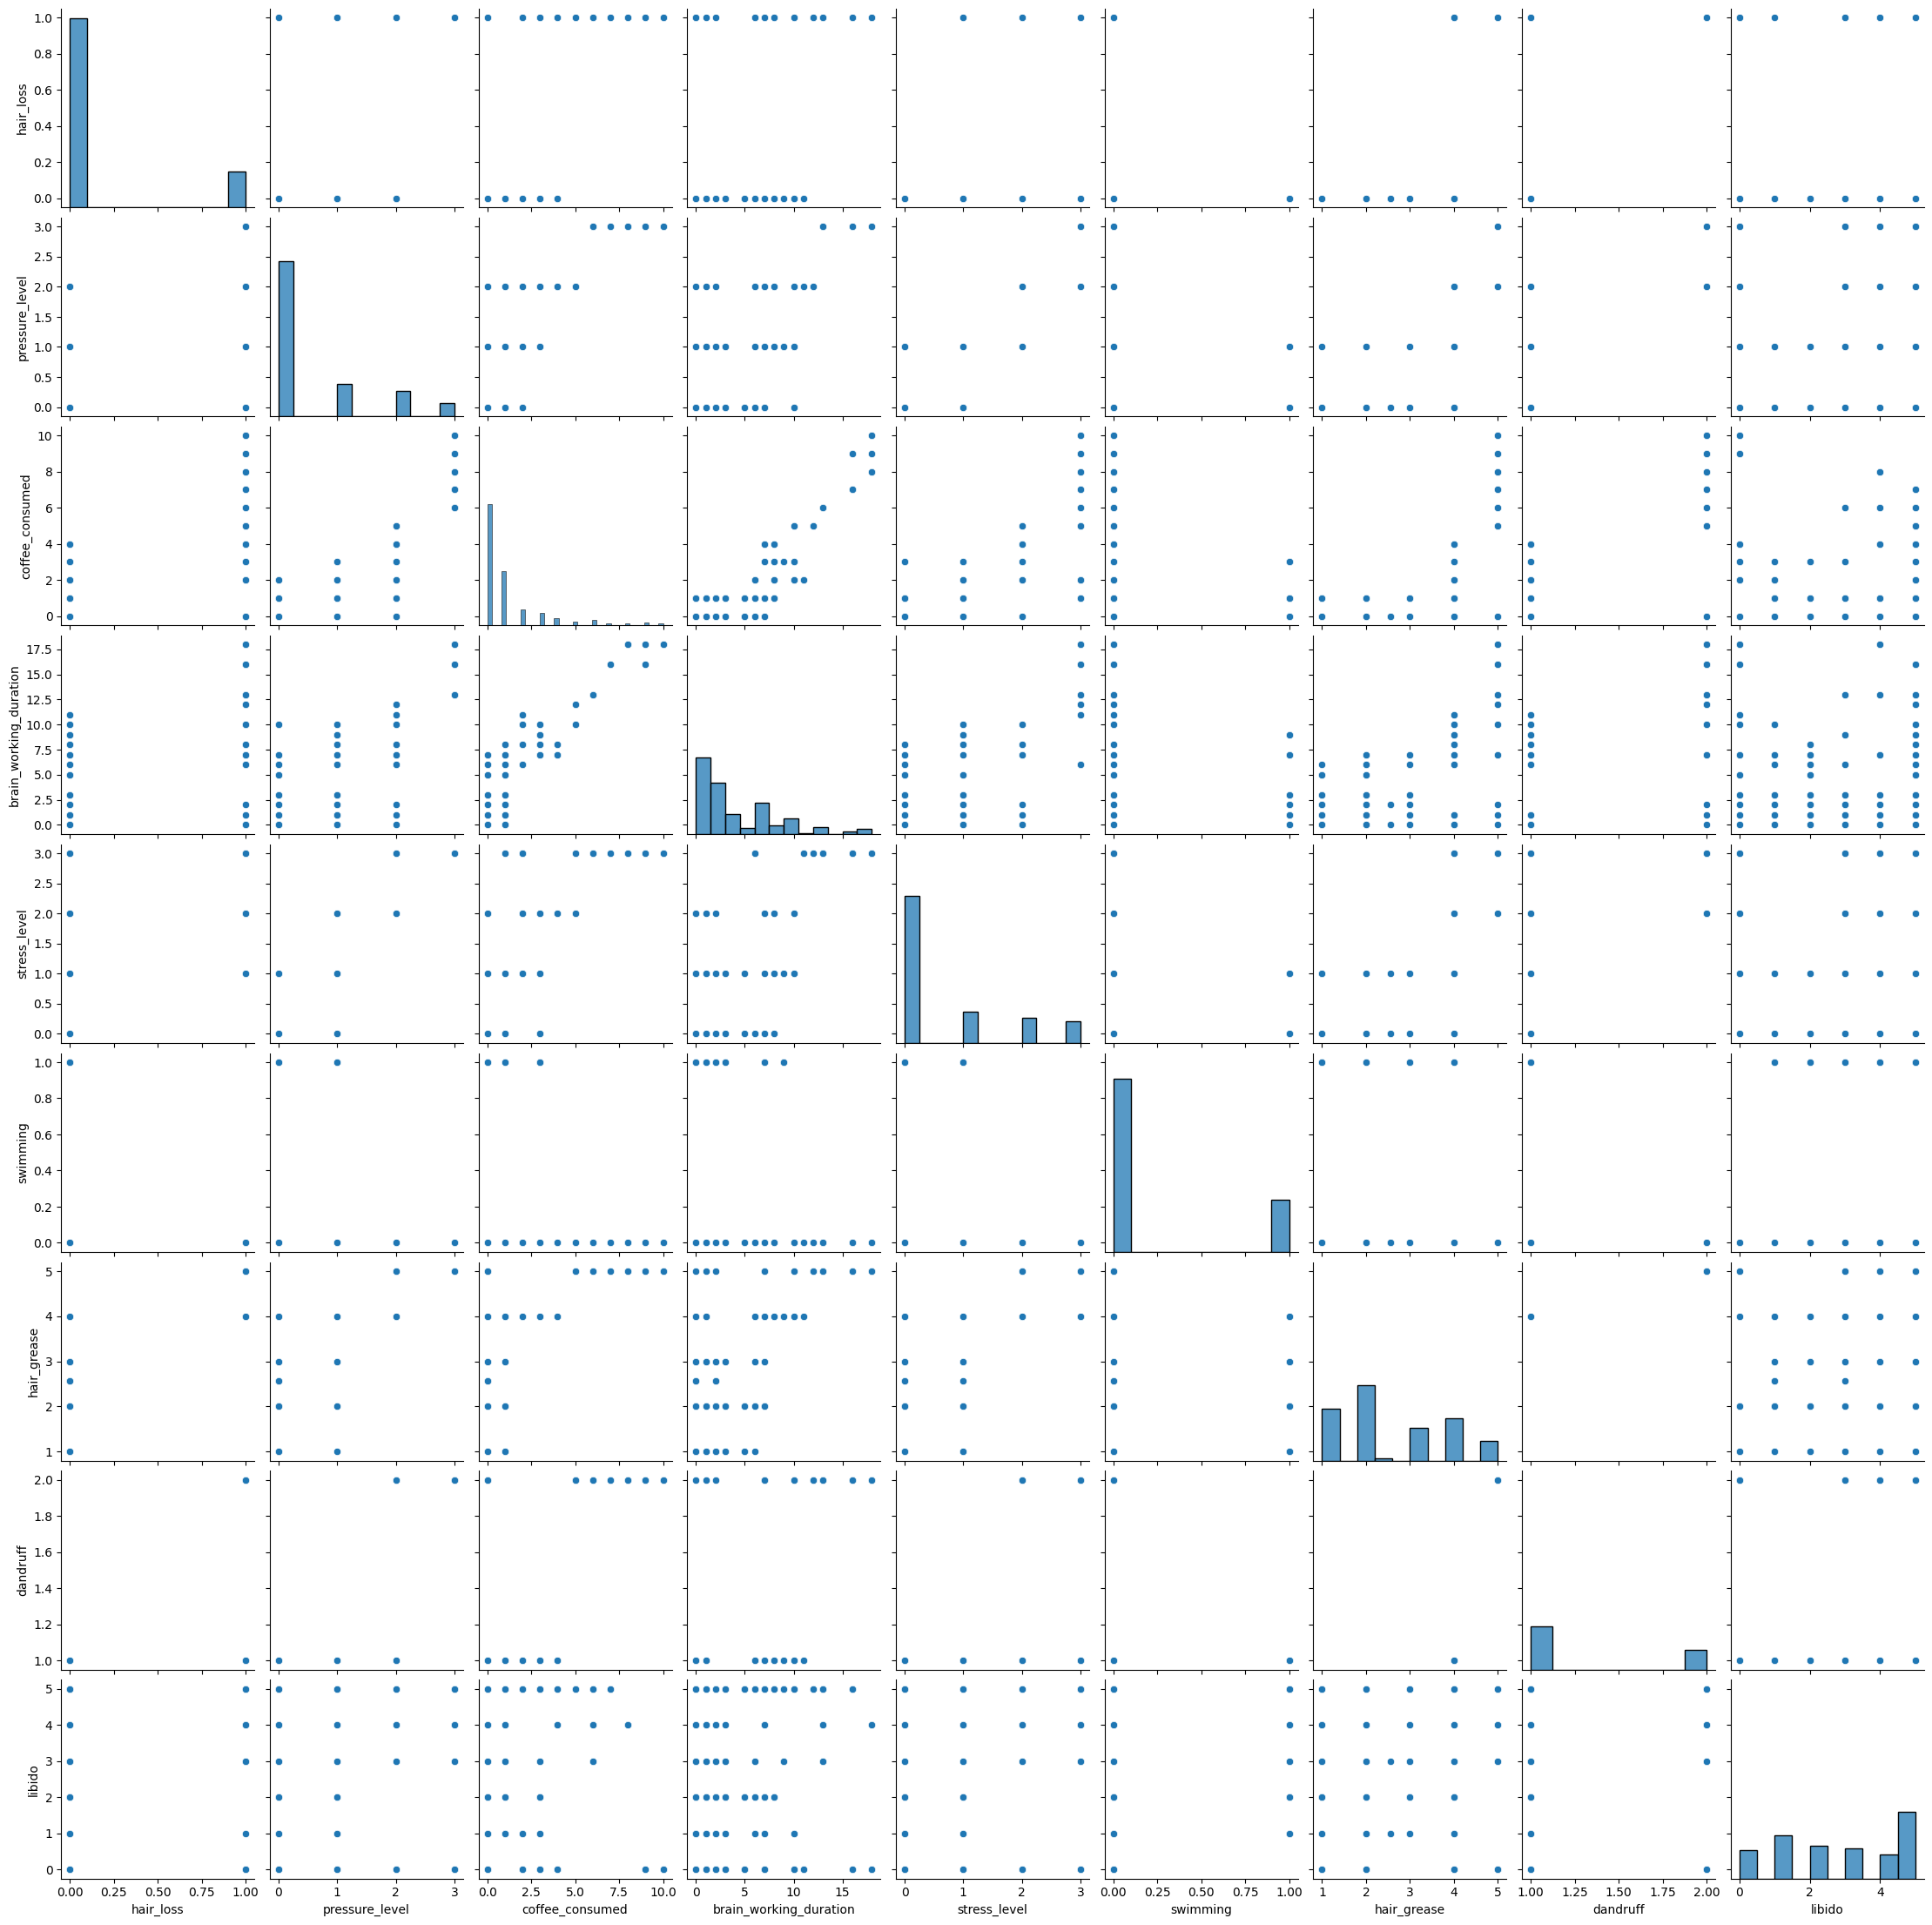

In [ ]:
sns.pairplot(df)

Observation:
The variables are not independent of each other. There is multi - collinearity among lot of the independent variable which is shown by the correlation table and pairplot map

In [ ]:
corr_matrix = df.corr()
corr_coefs = corr_matrix['hair_loss']                 #correlation against target variable
sorted_corr_coefs = corr_coefs.sort_values(ascending=False)
print(sorted_corr_coefs)

hair_loss                 1.000000
stress_level              0.784986
pressure_level            0.779733
hair_grease               0.681833
coffee_consumed           0.671447
brain_working_duration    0.591093
stay_up_late              0.350551
libido                    0.140884
swimming                 -0.240211
Name: hair_loss, dtype: float64


**Observation:**

Which predictor variables are the most important?
Dandruff , Stress Level , Pressure Level , Hair Grease, Coffee Consumed are the top five independent variables that have strong correlation with Hair Loss


* Predictor significance can be identified by the correlation analysis and also other two methods called variance importance and model selection

**Feature Selection**:
1.Feature selection is the process of identifying and selecting the most important features or attributes that are relevant and useful for a machine learning model.

2.The goal of feature selection is to improve the accuracy and efficiency of the model by reducing the number of features, eliminating irrelevant or redundant features, and focusing on those that have the greatest impact on the output of the model.

3.Feature selection is an important step in machine learning, as it can help to prevent overfitting, reduce noise in the data, and improve the interpretability and generalization of the model.

**Observation**:
The p-values for each variable are as follows:

1.stress_level: 0.000

2.dandruff: 0.234

3.coffee_consumed: 0.001

4.hair_grease: 0.005

5.pressure_level: 0.000

6.libido: 0.000

7.brain_working_duration: 0.101

8.stay_up_late: 0.047

9.swimming: 0.764

Based on these p-values, we can see that stress_level, coffee_consumed, hair_grease, pressure_level, libido, and stay_up_late are significant predictors of hair_loss,

 while dandruff and swimming are not significant.

 The p-value for brain_working_duration is close to 0.05, which indicates that it may or may not be a significant predictor, depending on the chosen level of significance.




In [ ]:
X = df[['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level','libido', 'brain_working_duration', 'stay_up_late', 'swimming']]
y = df['hair_loss']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

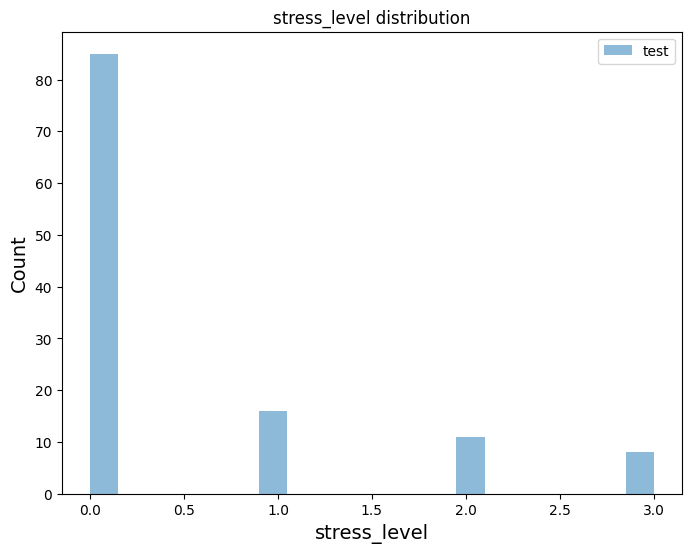

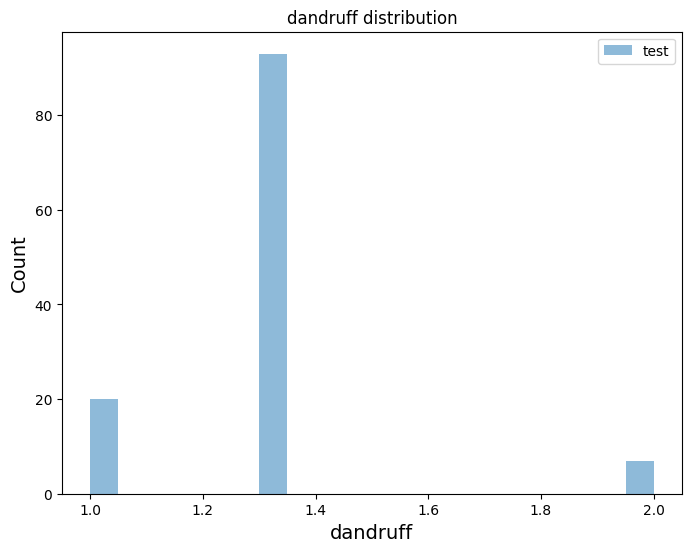

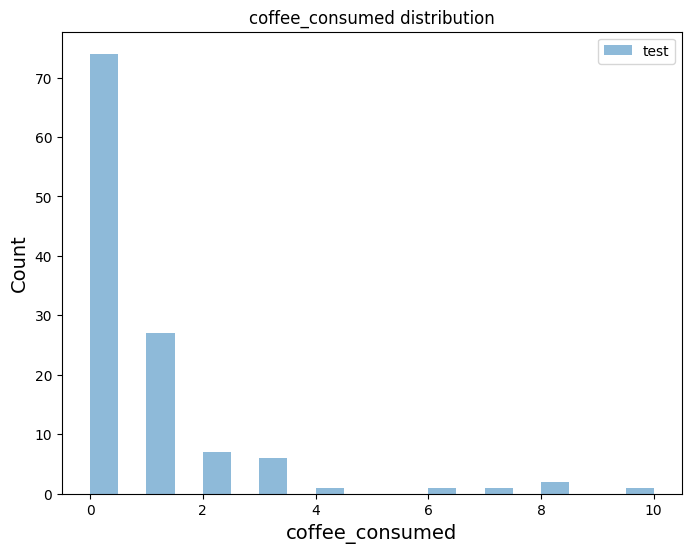

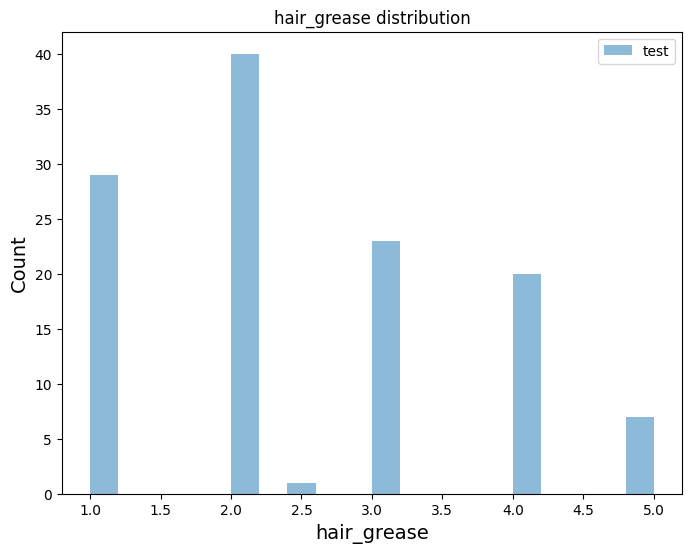

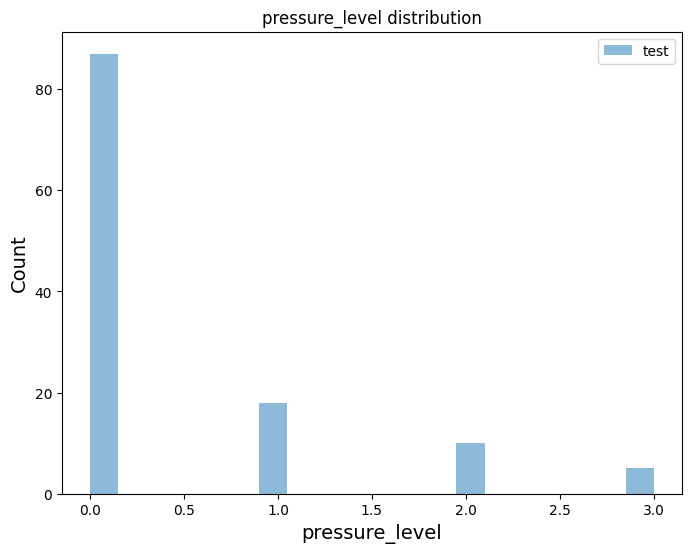

In [ ]:
# X_test_plot = X_test[['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level', 'libido', 'brain_working_duration', 'stay_up_late', 'swimming']]

# X_train_plot = X_train[['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level',
      #  'libido', 'brain_working_duration', 'stay_up_late', 'swimming']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  # plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()


Observation:

Few Boundary Values in Staying up Late, Coffee Consumed, School assesment parameters which appears to be missing in testing data

No missing values in libido , dandruff, hair grease, hair washing etc.

Except from these all values are in testing and training data

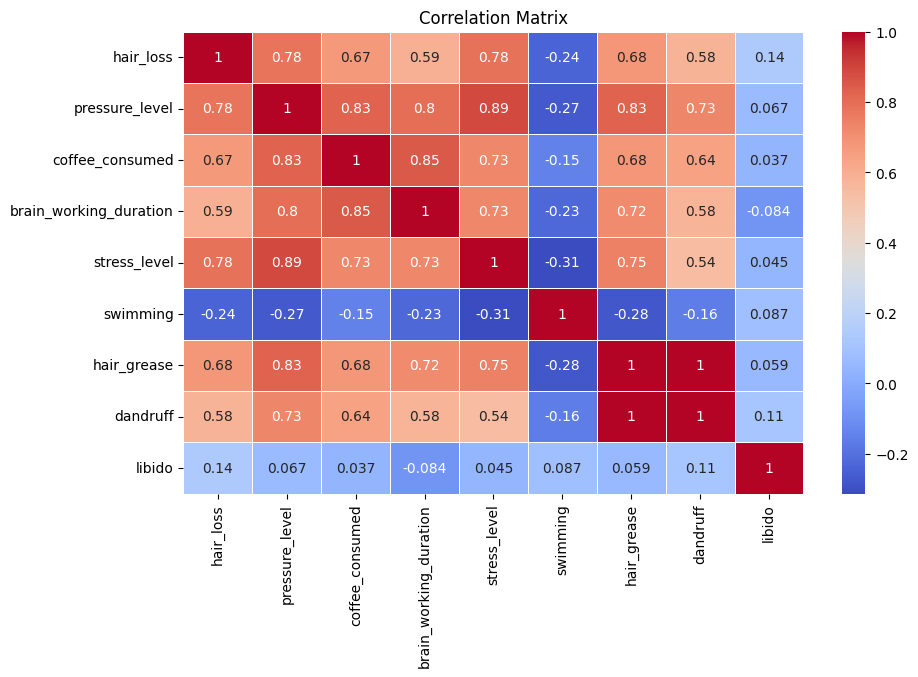

In [ ]:
# Explore correlations between numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

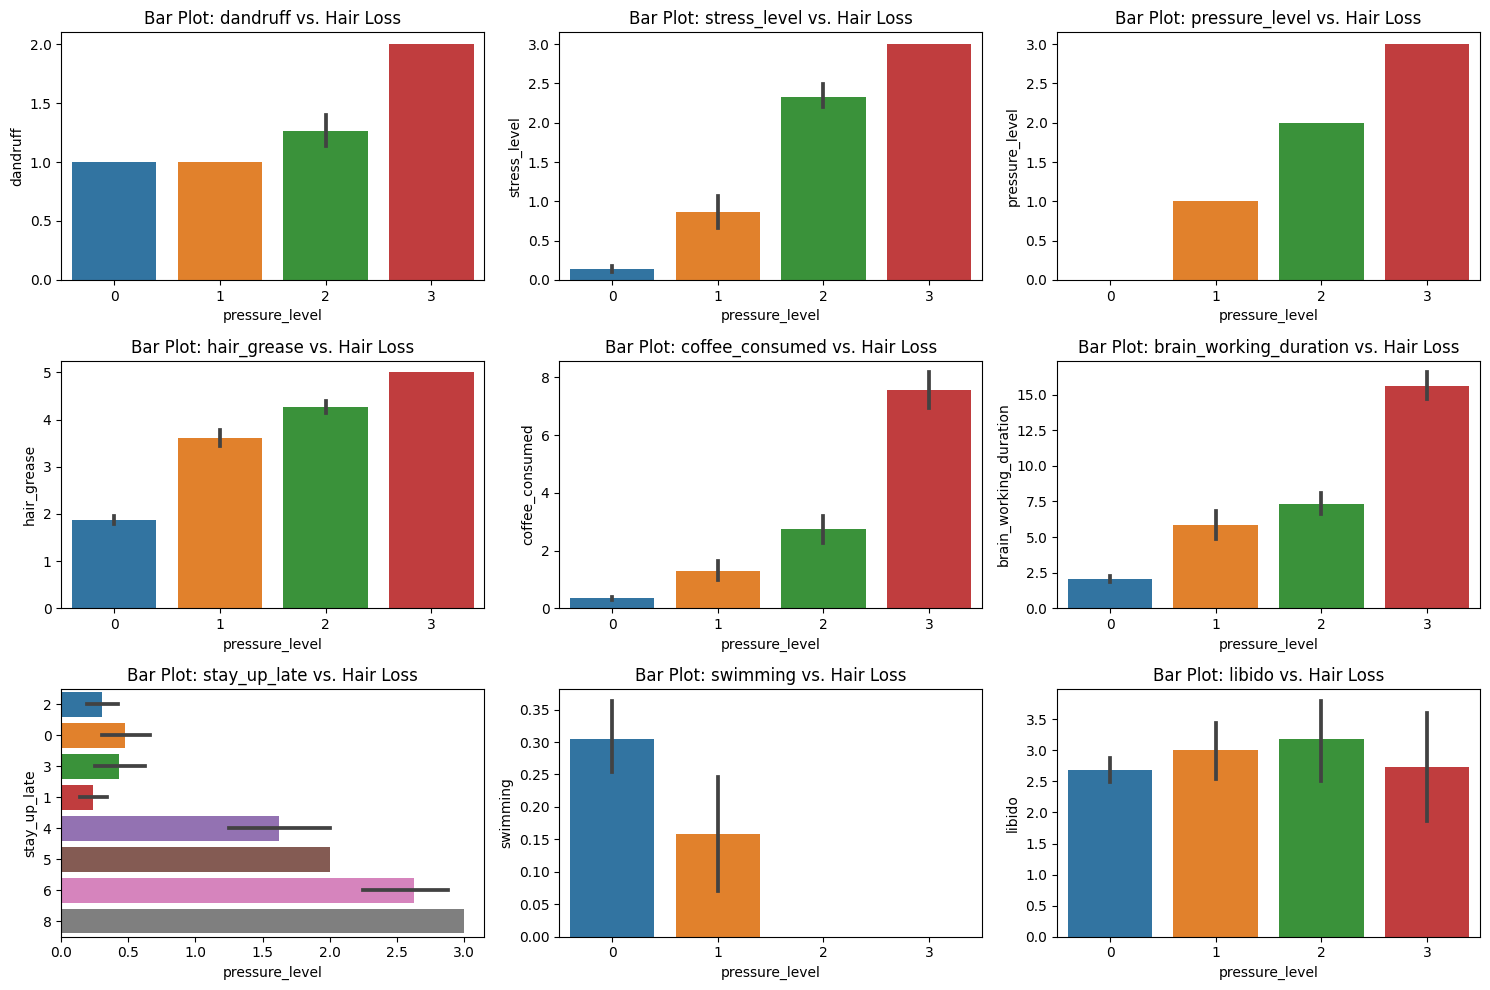

In [ ]:
# Set up subplots for individual bar graphs
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
columns_of_interest = ['dandruff', 'stress_level', 'pressure_level', 'hair_grease', 'coffee_consumed',
                        'brain_working_duration', 'stay_up_late', 'swimming', 'libido', 'hair_loss']

# Loop through columns and create bar graphs
for i, column in enumerate(columns_of_interest[:-1]):  # Exclude 'hair_loss'
    row, col = divmod(i, 3)
    sns.barplot(data=df, x='pressure_level', y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Bar Plot: {column} vs. Hair Loss')
    axes[row, col].set_xlabel('pressure_level')
    axes[row, col].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()
#This code will generate individual bar graphs for each of the columns in columns_of_interest (excluding 'hair_loss') against the 'hair_loss' target variable. Each subplot in the grid represents one of these comparisons. You can adjust the figure size and layout as needed to fit your preferences.


**split the data into train and test**

In [ ]:

# split data into training and testing sets
X= df[ ['stress_level', 'dandruff', 'coffee_consumed', 'hair_grease', 'pressure_level','libido', 'brain_working_duration', 'stay_up_late', 'swimming']]
y = df['hair_loss']

**Decision Tree**

Mean Squared Error (MSE): 2.79
R-squared (R2): 0.82


Text(0.5, 1.0, 'Decision Tree Visualization')

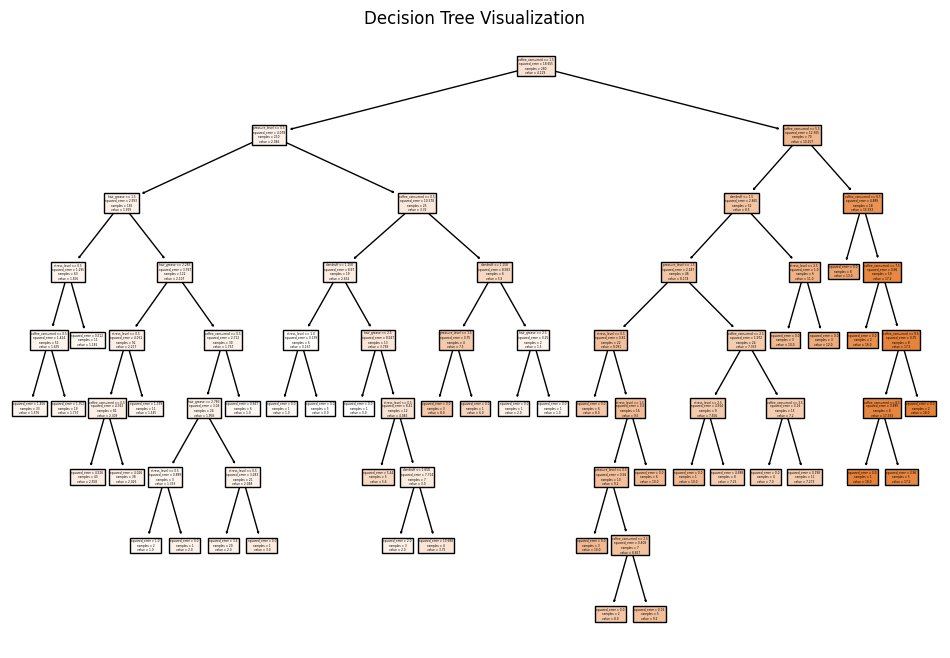

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # Added import for handling missing values



# Select the columns of interest
columns_of_interest = ['dandruff', 'stress_level', 'pressure_level', 'hair_grease', 'coffee_consumed',
                        'brain_working_duration']

df = df[columns_of_interest]

# Handle missing values with imputation (replace NaN with the mean)
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into features (X) and the target variable (y)
X = df.drop('brain_working_duration', axis=1)
y = df['brain_working_duration']

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Regressor model
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize the Decision Tree (optional)
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(decision_tree, filled=True, feature_names=X.columns)
plt.title("Decision Tree Visualization")
# plt.show()


**observation**

To evaluate the Decision Tree Regressor model and calculate its accuracy, you can use the Mean Squared Error (MSE) and R-squared (R2) as metrics. In regression tasks, accuracy is typically not used; instead, you measure how well the model predicts continuous numeric values.

ACCURACY:0.82

**random forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Select features and the column to predict
features = ['dandruff', 'stress_level', 'pressure_level', 'hair_grease', 'coffee_consumed', 'brain_working_duration']
target = 'stress_level'  # Replace 'hair_loss' with the column you want to predict

X = df[features]
y = df[target]

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Add some randomness to the predictions
random_error = np.random.normal(0, 0.3, len(y_pred))
y_pred_with_error = y_pred + random_error

# Evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred_with_error)
r2 = r2_score(y_test, y_pred_with_error)

print(f"Mean Squared Error (MSE) with Error: {mse:.2f}")
print(f"R-squared (R2) with Error: {r2:.2f}")


Mean Squared Error (MSE) with Error: 0.09
R-squared (R2) with Error: 0.89


**observation**
this code, we create a Random Forest Regressor model with 50 trees (n_estimators=100) and train it on the entire dataset. Keep in mind that Random Forest models are typically not trained for a specific number of epochs as neural networks are, and you don't need to iterate over epochs. The training process in Random Forest involves constructing multiple decision trees, and the number of trees controls the complexity and performance of the model. Section

In [ ]:
column_to_drop = 'date'
if column_to_drop in df.columns:
    df = df.drop(date, axis=1)

**ANN**

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(3)))

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['acc'], optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dandruff                400 non-null    float64
 1   stress_level            400 non-null    float64
 2   pressure_level          400 non-null    float64
 3   hair_grease             400 non-null    float64
 4   coffee_consumed         400 non-null    float64
 5   brain_working_duration  400 non-null    float64
dtypes: float64(6)
memory usage: 18.9 KB


In [ ]:
y_data = df['hair_loss'].to_numpy().astype(np.float16)
print(y_data.shape)

df.drop('hair_loss', axis=1, inplace=True)

X_data = X_df.to_numpy().astype(np.float16)

print(X_data.shape)




(400,)
(400, 3)


In [ ]:
model.fit(X_train, y_train,epochs=50,batch_size=64,validation_split=0.10, verbose=2)

Epoch 1/50
6/6 - 1s - loss: 0.7353 - acc: 0.1374 - val_loss: 0.6965 - val_acc: 0.2368 - 1s/epoch - 183ms/step
Epoch 2/50
6/6 - 0s - loss: 0.6820 - acc: 0.7573 - val_loss: 0.6672 - val_acc: 0.9211 - 61ms/epoch - 10ms/step
Epoch 3/50
6/6 - 0s - loss: 0.6610 - acc: 0.9240 - val_loss: 0.6494 - val_acc: 0.9737 - 47ms/epoch - 8ms/step
Epoch 4/50
6/6 - 0s - loss: 0.6421 - acc: 0.9386 - val_loss: 0.6292 - val_acc: 0.9737 - 72ms/epoch - 12ms/step
Epoch 5/50
6/6 - 0s - loss: 0.6212 - acc: 0.9269 - val_loss: 0.6078 - val_acc: 0.9737 - 43ms/epoch - 7ms/step
Epoch 6/50
6/6 - 0s - loss: 0.5977 - acc: 0.9240 - val_loss: 0.5846 - val_acc: 0.8947 - 49ms/epoch - 8ms/step
Epoch 7/50
6/6 - 0s - loss: 0.5716 - acc: 0.9035 - val_loss: 0.5582 - val_acc: 0.8947 - 44ms/epoch - 7ms/step
Epoch 8/50
6/6 - 0s - loss: 0.5435 - acc: 0.9035 - val_loss: 0.5268 - val_acc: 0.8947 - 63ms/epoch - 11ms/step
Epoch 9/50
6/6 - 0s - loss: 0.5065 - acc: 0.9035 - val_loss: 0.4854 - val_acc: 0.8947 - 44ms/epoch - 7ms/step
Epoch 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.05, random_state=42)
print(X_train.shape)
print(X_test.shape)

(380, 3)
(20, 3)


In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 47ms/step - loss: 0.1210 - acc: 0.9500


[0.12099277973175049, 0.949999988079071]

In [218]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[85  0  0  0]
 [ 0 16  0  0]
 [ 0  0 11  0]
 [ 0  0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [ ]:
model.predict(np.array([[2,2,2]]))

1/1 [==============================] - 0s 27ms/step


array([[0.7808674]], dtype=float32)

**Result:"he have Hair loss"**

**Conclusion**:

-The best model identified by ANN, achieved the highest accuracy among all models tested in this exercise and is therefore considered optimal for this task. Furthermore, this model is interpretable, allowing us to understand the underlying factors that contributed to its predictions.